# **What business sector has the greatest impact on GDP?**

## *About and members:* 👤

Group:
> Igó Ferreira Melo Silva (20220155214)

> Gilherme Barboza de Sousa (20220007418)

> Davi Nasiasene Amorim (20220056987)

This is a notebook created as a project for Introduction to Data Science subject, in which we will explore a dataset that contains several informations about Brazilian municipalities.

Through the analysis made it, will be possible to answer three questions:

+ Which line of business has the most impact on a city's GDP?

+ Does the average temperature where we live impact longevity?

+ Which parallel would divide Brazil so that half of the population would be in the north and the other half in the south?

## *The Dataset:* 🌏

### **Dataset Link**

https://www.kaggle.com/datasets/crisparada/brazilian-cities?select=BRAZIL_CITIES.csv

### **Context**

This dataset is a compilation of several publicly available information about Brazilian Municipalities.

## Definitions

#### GDP stands for Gross Domestic Product, and it is a widely used measure of the economic activity within a country. It represents the total value of all goods and services produced in a country over a specific period, typically a year.

#### GVA, on the other hand, stands for Gross Value Added. It is a related concept to GDP and measures the value generated by individual sectors or industries of an economy. GVA represents the difference between the value of goods and services produced by a sector or industry and the cost of inputs used in the production process. It essentially shows the contribution of each sector to the overall GDP.

## Importing the Dataset and Libraries: 📖

In [8]:
# importing libraries
import pandas as pd
import seaborn as sns

In [9]:
# loading data
url = 'https://raw.githubusercontent.com/IgoSilvaUFPB/projeto_ICD/main/BRAZIL_CITIES.csv'
df = pd.read_csv(url, sep = ';')
df

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,COMP_R,COMP_S,COMP_T,COMP_U,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,POST_OFFICES
0,Alvorada,RS,0,195673,195483,190,60221,60221,0,194483,...,32,117,0,0,58183,17062,71,0,0,1
1,Montenegro,RS,0,59415,59332,83,19953,18142,1811,49775,...,67,126,0,0,26888,10365,114,0,0,1
2,São Gabriel,RS,0,60425,60356,69,20169,17851,2318,53292,...,36,94,0,0,18038,6849,17,0,0,1
3,Candeias,BA,0,83158,83158,0,24971,22901,2070,67850,...,4,40,0,0,11322,7260,4,0,0,1
4,Itaparica,BA,0,20725,20685,40,6364,6364,0,19132,...,2,9,0,0,1491,985,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Marajá Do Sena,MA,0,8051,8051,0,1759,260,1499,1158,...,0,0,0,0,11,634,0,0,0,0
5556,São Valério,TO,0,4383,4383,0,1347,806,541,2718,...,0,1,0,0,0,0,0,0,0,0
5557,Januário Cicco,RN,0,9011,9011,0,2469,936,1533,3365,...,1,1,0,0,0,0,0,0,0,0
5558,São Domingos,PB,0,2855,2855,0,829,302,527,980,...,0,12,0,0,0,0,0,0,0,0


In [10]:
# selecting columns
df_GDP = df[["CITY","STATE","GVA_AGROPEC","GVA_INDUSTRY","GVA_SERVICES","GVA_PUBLIC"]]
df_GDP

,CITY,STATE,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC
0,Alvorada,RS,1379.14,450.98,1108.76,749842.52
1,Montenegro,RS,55804.00,962545.76,1101667.53,312205.89
2,São Gabriel,RS,373579.14,138879.99,670663.08,256790.98
3,Candeias,BA,13590.09,1427752.24,1159.05,335125.70
4,Itaparica,BA,7265.47,21341.65,93112.91,74443.99
...,...,...,...,...,...,...
5555,Marajá Do Sena,MA,15153.40,1867.85,8791.25,23595.13
5556,São Valério,TO,23067.90,1725.31,15938.97,25.12
5557,Januário Cicco,RN,2219.54,2.58,10173.45,45043.45
5558,São Domingos,PB,2606.86,1003.48,4471.31,16.74


In [11]:
# checking column data types
df_GDP.dtypes

CITY             object
STATE            object
GVA_AGROPEC     float64
GVA_INDUSTRY    float64
GVA_SERVICES    float64
GVA_PUBLIC      float64
dtype: object

## Grouping the GVA by states

In [12]:
# grouping by state
df_GDP_state = df_GDP.groupby('STATE').sum()
df_GDP_state

,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC
STATE,,,,
AC,1205109.01,2.452453e+05,4.926704e+06,4.776033e+06
AL,6290991.83,5.408255e+06,1.961311e+07,1.076059e+07
AM,5501420.37,2.614704e+07,2.972834e+06,5.708798e+06
AP,282821.46,1.581287e+06,5.198060e+06,6.100526e+06
BA,13620578.44,3.883109e+07,9.806740e+07,4.055358e+07
CE,4557361.72,2.148855e+07,5.941452e+07,2.550215e+07
DF,820754.66,9.659849e+06,1.038195e+08,9.205145e+04
ES,3777989.66,2.041224e+07,4.647603e+07,1.220736e+07
GO,17087996.15,2.819178e+07,7.456789e+07,2.030766e+07


## Visually representing the contribution of each sector

<AxesSubplot:xlabel='STATE'>

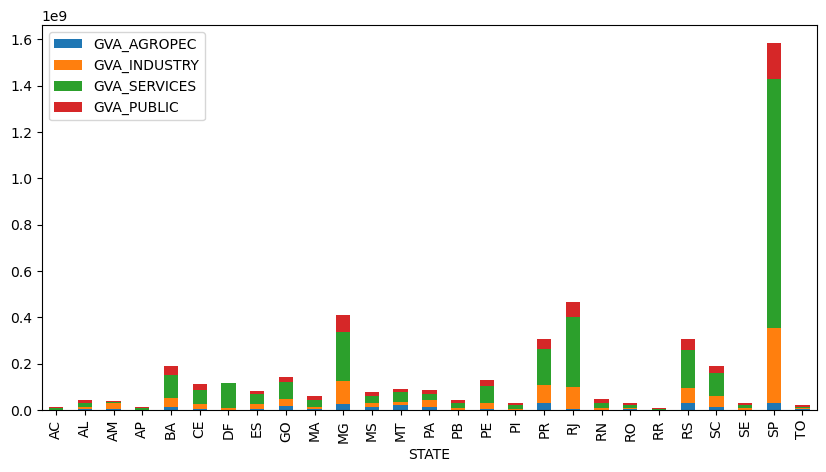

In [13]:
# Stacked bar chart of GVA by state
df_GDP_state.plot(kind='bar', stacked=True, figsize=(10, 5))

<AxesSubplot:ylabel='STATE'>

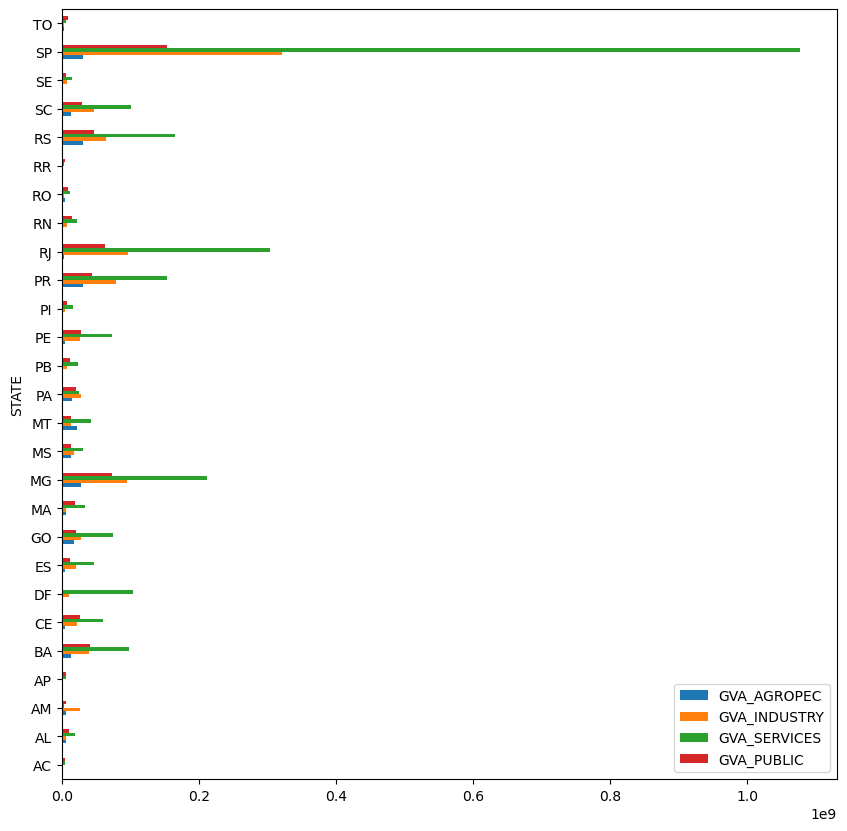

In [14]:
# Grouped bar chart of GVA by state horizontaly
df_GDP_state.plot(kind='barh', figsize=(10, 10))

### From the above plots, it is evident that services play a significantly larger role in the GDP of most states, and this trend can be extended to cities and even the entire country.